In [1]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [2]:
from functions.model_evaluation import *
from functions.model_saving_loading import *

In [3]:
%store -r RES 
%store -r WIDTH
%store -r HEIGHT
%store -r N_BANDS
%store -r N_CAT
%store -r TRAINING_YEARS 
%store -r TRAINING_SEASONS
%store -r MSK_PATH
%store -r MASK_FILE
%store -r MSK_RAW_PTH 
%store -r MSK_CLIP_PTH 
%store -r MAPPED_MSK_CLIP_PTH 
%store -r MSK_TILES_PTH
%store -r CLN_MSK_TILES_PTH
%store -r IMG_18_PATH 
%store -r IMG_18_FILE 
%store -r IMG_18_COMP_PTH 
%store -r IMG_18_CLIP_PTH 
%store -r IMG_18_NORM_PTH 
%store -r IMG_18_TILES_PTH 
%store -r CLN_IMG_18_TILES_PTH
%store -r IMG_19_PATH
%store -r IMG_19_FILE 
%store -r IMG_19_COMP_PTH
%store -r IMG_19_CLIP_PTH
%store -r IMG_19_NORM_PTH 
%store -r IMG_19_TILES_PTH
%store -r CLN_IMG_19_TILES_PTH 
%store -r MODELS_DIR 
%store -r TRAIN_SPLIT
%store -r TEST_SPLIT
%store -r DATASETS_DIR
%store -r MODELS_TO_LOAD_DIR 
%store -r INFERENCE_INPUT_DIR
%store -r TILE_SIZE
%store -r N_CLASSES
%store -r lgnd

RES = RES
WIDTH = WIDTH
HEIGHT = HEIGHT
N_BANDS = N_BANDS
N_CAT = N_CAT
TRAINING_YEARS = TRAINING_YEARS
TRAINING_SEASONS = TRAINING_SEASONS
MSK_PATH = MSK_PATH
MASK_FILE = MASK_FILE
MSK_RAW_PTH = MSK_RAW_PTH
MSK_CLIP_PTH = MSK_CLIP_PTH
MAPPED_MSK_CLIP_PTH = MAPPED_MSK_CLIP_PTH
MSK_TILES_PTH = MSK_TILES_PTH
CLN_MSK_TILES_PTH = CLN_MSK_TILES_PTH
IMG_18_PATH = IMG_18_PATH
IMG_18_FILE = IMG_18_FILE
IMG_18_COMP_PTH = IMG_18_COMP_PTH
IMG_18_CLIP_PTH = IMG_18_CLIP_PTH
IMG_18_NORM_PTH = IMG_18_NORM_PTH
IMG_18_TILES_PTH = IMG_18_TILES_PTH
CLN_IMG_18_TILES_PTH = CLN_IMG_18_TILES_PTH
IMG_19_PATH = IMG_19_PATH
IMG_19_FILE = IMG_19_FILE
IMG_19_COMP_PTH = IMG_19_COMP_PTH
IMG_19_CLIP_PTH = IMG_19_CLIP_PTH
IMG_19_NORM_PTH = IMG_19_NORM_PTH
IMG_19_TILES_PTH = IMG_19_TILES_PTH
CLN_IMG_19_TILES_PTH = CLN_IMG_19_TILES_PTH
MODELS_DIR = MODELS_DIR
TRAIN_SPLIT = TRAIN_SPLIT
TEST_SPLIT = TEST_SPLIT
DATASETS_DIR = DATASETS_DIR
MODELS_TO_LOAD_DIR = MODELS_TO_LOAD_DIR
INFERENCE_INPUT_DIR = INFERENCE_INPUT_DIR
TILE_SIZE = TILE_SIZE
N_CLASSES = N_CLASSES
lgnd = lgnd

# Load Datasets

In [4]:
processed_image_ds_train = tf.data.Dataset.load(os.path.join(DATASETS_DIR, "processed_image_ds_train"))
processed_image_ds_val = tf.data.Dataset.load(os.path.join(DATASETS_DIR, "processed_image_ds_val"))
processed_image_ds_test = tf.data.Dataset.load(os.path.join(DATASETS_DIR, "processed_image_ds_test"))

2023-10-13 18:14:18.701558: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-10-13 18:14:18.701576: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2023-10-13 18:14:18.701582: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2023-10-13 18:14:18.701609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-13 18:14:18.701621: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Single model training
#### (refer to model.py for model achitecture)

In [5]:
hyperparameters = {
    'buffer_size': 300,
    'batch_size': 16,
    'learning_rate': 0.0002,
    'dropout_prob': 0.3,
    'n_filters': 32, # must be a multiple of 16
    'w_decay': 6e-03,
    'epochs': 5,
    'early_stop_patience': 20,
    'early_stop_min_delta': 0.0001,
    'n_blocks': 5,
    'drop_multiplier': [0, 0, 0.5, 1, 1.5],
    'weight_multiplier': [0, 1, 1, 1, 1],
    'filter_growth': 2
}

Epoch 1/5


2023-10-13 18:14:19.541567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


162/162 [==============================] - 12s 67ms/step - loss: 12.3728 - accuracy: 0.5841 - val_loss: 5.6757 - val_accuracy: 0.7200
Epoch 2/5
162/162 [==============================] - 10s 59ms/step - loss: 3.6179 - accuracy: 0.7768 - val_loss: 2.3556 - val_accuracy: 0.7951
Epoch 3/5
162/162 [==============================] - 10s 59ms/step - loss: 1.8619 - accuracy: 0.8017 - val_loss: 1.5332 - val_accuracy: 0.8035
Epoch 4/5
162/162 [==============================] - 10s 59ms/step - loss: 1.3280 - accuracy: 0.8129 - val_loss: 1.1719 - val_accuracy: 0.8219
Epoch 5/5
162/162 [==============================] - 10s 59ms/step - loss: 1.0985 - accuracy: 0.8174 - val_loss: 1.0098 - val_accuracy: 0.8245


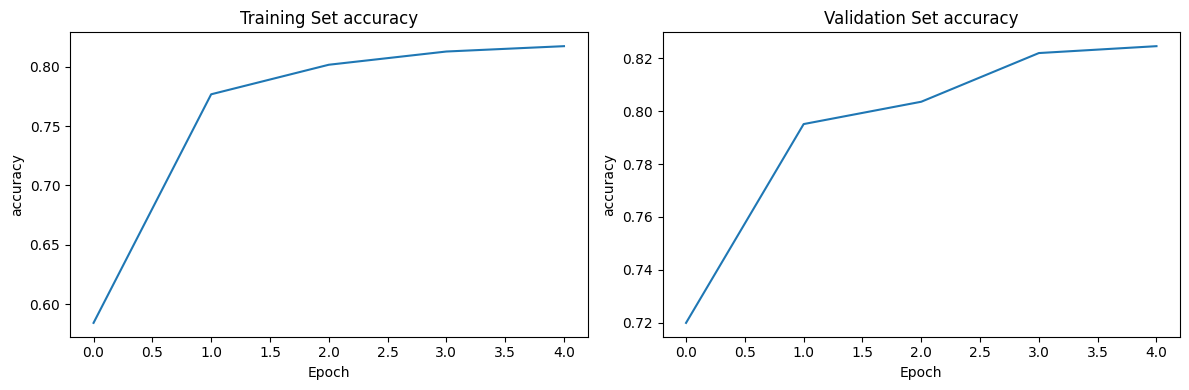

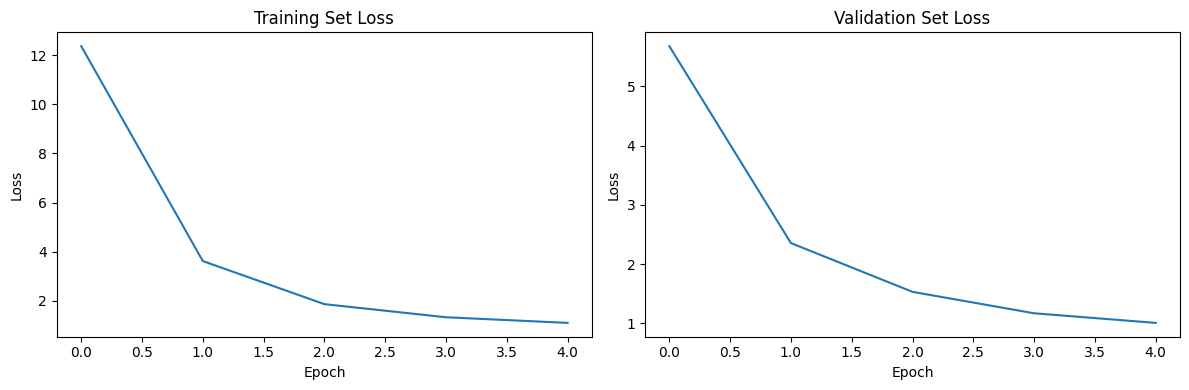

In [6]:
single_model = single_training_modular(hyperparameters, 
                    processed_image_ds_train, 
                    processed_image_ds_val, 
                    processed_image_ds_test,
                    HEIGHT,
                    WIDTH,
                    N_BANDS,
                    N_CLASSES,
                    compare_acc=True,
                    compare_lss=True,
                    early_stopping = True,
                    restore_best=True,
                    model_summary=False)

In [7]:
single_model = add_info_single_model(processed_image_ds_train,
                          processed_image_ds_val,
                          processed_image_ds_test,
                          single_model,
                          lgnd)

Dataset loss: 1.0098
Dataset accuracy: 82.5%
True lables unique: [1 2 3 4 5]
Predicted lables unique: [1 2 3 4 5]

----------------------------------------------
Confusion Matrix
[[ 174078   15720     100   23441   35661]
 [   3626  569704       0   14131  204181]
 [    900      83    5796    5481    1472]
 [  26333   17369     488 1399899  140663]
 [  30323   48386      83   92871  957531]]

----------------------------------------------

Class 1: Precision = 0.7399, Recall = 0.6991, F1 Score = 0.7189   <---->   Build. + Other constr.
Class 2: Precision = 0.8748, Recall = 0.7196, F1 Score = 0.7897   <---->   Bare + Seasonal + Vineyards
Class 3: Precision = 0.8962, Recall = 0.4221, F1 Score = 0.5739   <---->   Water
Class 4: Precision = 0.9115, Recall = 0.8834, F1 Score = 0.8972   <---->   Trees + Bushes
Class 5: Precision = 0.7148, Recall = 0.8480, F1 Score = 0.7757   <---->   Permanent herbaceous vegetation

Average F1 Score: 0.7511
---------------------------------------------------

In [8]:
save_single_model_and_info(single_model, MODELS_DIR, lgnd_dict=lgnd)

INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_15m_14s/model_13_10_2023-18h_15m_09s/model_13_10_2023-18h_15m_09s_model/assets


INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_15m_14s/model_13_10_2023-18h_15m_09s/model_13_10_2023-18h_15m_09s_model/assets


Saved model 'model_13_10_2023-18h_15m_09s' and its information in 'trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_15m_14s/model_13_10_2023-18h_15m_09s'.


# Hyperparameter tuning (parameter grid)

In [9]:
# Define the hyperparameter grid
param_grid = {
    'buffer_size': [250],
    'batch_size': [16],
    'learning_rate': [0.0002],
    'dropout_prob': [0.3],
    'n_filters': [16],
    'w_decay': [6e-03],
    'epochs': [10],
    'early_stop_patience': [20],
    'early_stop_min_delta': [0.0001],
    'n_blocks': [5],
    'drop_multiplier': [[0, 0, 0.5, 1, 1.5], [0, 0, 0.5, 1, 1]],
    'weight_multiplier': [[0, 1, 1, 1, 1]],
    'filter_growth': [2]
}

In [10]:
all_models_grid, unet_models_grid = hyperparameters_model_grid_modular(param_grid = param_grid, 
                           processed_image_ds_train=processed_image_ds_train, 
                           processed_image_ds_val=processed_image_ds_val, 
                           processed_image_ds_test=processed_image_ds_test,
                           img_height=HEIGHT,
                           img_width=WIDTH,
                           num_channels=N_BANDS,
                           num_classes= N_CLASSES,
                           compare_acc = False,
                           compare_lss = False,
                           early_stopping = True,
                           restore_best=True
                           )


--------------------------------------------------------------------------------------------------------------
model_13_10_2023-18h_15m_15s
Testing parameters: {'batch_size': 16, 'buffer_size': 250, 'drop_multiplier': [0, 0, 0.5, 1, 1.5], 'dropout_prob': 0.3, 'early_stop_min_delta': 0.0001, 'early_stop_patience': 20, 'epochs': 10, 'filter_growth': 2, 'learning_rate': 0.0002, 'n_blocks': 5, 'n_filters': 16, 'w_decay': 0.006, 'weight_multiplier': [0, 1, 1, 1, 1]}
Epoch 1/10
162/162 [==============================] - 9s 47ms/step - loss: 8.0495 - accuracy: 0.4854 - val_loss: 4.6813 - val_accuracy: 0.6442
Epoch 2/10
162/162 [==============================] - 7s 40ms/step - loss: 3.3678 - accuracy: 0.6685 - val_loss: 2.4221 - val_accuracy: 0.7109
Epoch 3/10
162/162 [==============================] - 7s 42ms/step - loss: 1.9862 - accuracy: 0.7178 - val_loss: 1.6232 - val_accuracy: 0.7515
Epoch 4/10
162/162 [==============================] - 7s 41ms/step - loss: 1.4566 - accuracy: 0.7558 - v

In [11]:
best_avg_f1_model_grid, results_grid = add_models_info(all_models_grid,
                    processed_image_ds_train, 
                    processed_image_ds_val,
                    processed_image_ds_test,
                    unet_models_grid,
                    lgnd)

MODEL: model_13_10_2023-18h_15m_15s
Dataset loss: 0.8447
Dataset accuracy: 81.7%
True lables unique: [1 2 3 4 5]
Predicted lables unique: [1 2 4 5]

----------------------------------------------
Confusion Matrix
[[ 170272   16177       0   24512   38039]
 [   3579  553380       0   16461  218222]
 [   5739      59       0    6473    1461]
 [  27209   16606       0 1409077  131860]
 [  31503   47245       0  103974  946472]]

----------------------------------------------

Class 1: Precision = 0.7145, Recall = 0.6838, F1 Score = 0.6988   <---->   Build. + Other constr.
Class 2: Precision = 0.8736, Recall = 0.6990, F1 Score = 0.7766   <---->   Bare + Seasonal + Vineyards
Class 3: Precision = 0.0000, Recall = 0.0000, F1 Score = 0.0000   <---->   Water
Class 4: Precision = 0.9030, Recall = 0.8891, F1 Score = 0.8960   <---->   Trees + Bushes
Class 5: Precision = 0.7084, Recall = 0.8382, F1 Score = 0.7679   <---->   Permanent herbaceous vegetation

Average F1 Score: 0.6279
-----------------

In [12]:
merged_info = merge_model_info(all_models_grid, results_grid)

In [13]:
save_models_and_info(merged_info, MODELS_DIR, lgnd)

INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_17m_48s/model_13_10_2023-18h_15m_15s/model_13_10_2023-18h_15m_15s_model/assets


INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_17m_48s/model_13_10_2023-18h_15m_15s/model_13_10_2023-18h_15m_15s_model/assets


Saved model 'model_13_10_2023-18h_15m_15s' and its information in 'trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_17m_48s/model_13_10_2023-18h_15m_15s'.
INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_17m_48s/model_13_10_2023-18h_16m_24s/model_13_10_2023-18h_16m_24s_model/assets


INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_17m_48s/model_13_10_2023-18h_16m_24s/model_13_10_2023-18h_16m_24s_model/assets


Saved model 'model_13_10_2023-18h_16m_24s' and its information in 'trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_17m_48s/model_13_10_2023-18h_16m_24s'.


# Hyperparameter tuning (continuous random hyperparameters)

In [14]:
# Define the hyperparameter ranges. To set one parameter as 0, both lower and upper bounderies have to be 0 -> 'dropout_prob': (0.0, 0.0). For lists, create two lists with the upper and lower bounderies for each value
param_ranges_continuous = {
    'buffer_size': (300, 300),
    'batch_size': (16,16),
    'learning_rate': (0.0002, 0.0002),
    'dropout_prob': (0.3, 0.3),
    'n_filters': (32, 32), # must be a multiple of 16
    'w_decay': (6e-03, 6e-03),
    'epochs': (5, 5),
    'early_stop_patience': (15, 15),
    'early_stop_min_delta': (0.0001, 0.0001),
    'n_blocks': (5,5),
    'drop_multiplier': ([0, 0, 0.5, 1, 1.5], [0, 0, 0.5, 1, 1.5]),
    'weight_multiplier': ([0, 1, 1, 1, 1], [0, 1, 1, 1, 1]),
    'filter_growth': (2,2)
}

--------------------------------------------------------------------------------------------------------------
Model 1: model_13_10_2023-18h_17m_51s

Testing parameters: {'buffer_size': 300, 'batch_size': 16, 'learning_rate': 0.0002, 'dropout_prob': 0.3, 'n_filters': 32, 'w_decay': 0.006, 'epochs': 5, 'early_stop_patience': 15, 'early_stop_min_delta': 0.0001, 'n_blocks': 5, 'drop_multiplier': [0.0, 0.0, 0.5, 1.0, 1.5], 'weight_multiplier': [0.0, 1.0, 1.0, 1.0, 1.0], 'filter_growth': 2}
Epoch 1/5
162/162 [==============================] - 13s 74ms/step - loss: 12.2104 - accuracy: 0.6063 - val_loss: 5.5413 - val_accuracy: 0.7335
Epoch 2/5
162/162 [==============================] - 10s 64ms/step - loss: 3.5529 - accuracy: 0.7555 - val_loss: 2.3408 - val_accuracy: 0.7812
Epoch 3/5
162/162 [==============================] - 10s 62ms/step - loss: 1.8935 - accuracy: 0.7832 - val_loss: 1.6165 - val_accuracy: 0.7809
Epoch 4/5
162/162 [==============================] - 10s 62ms/step - loss: 1.40

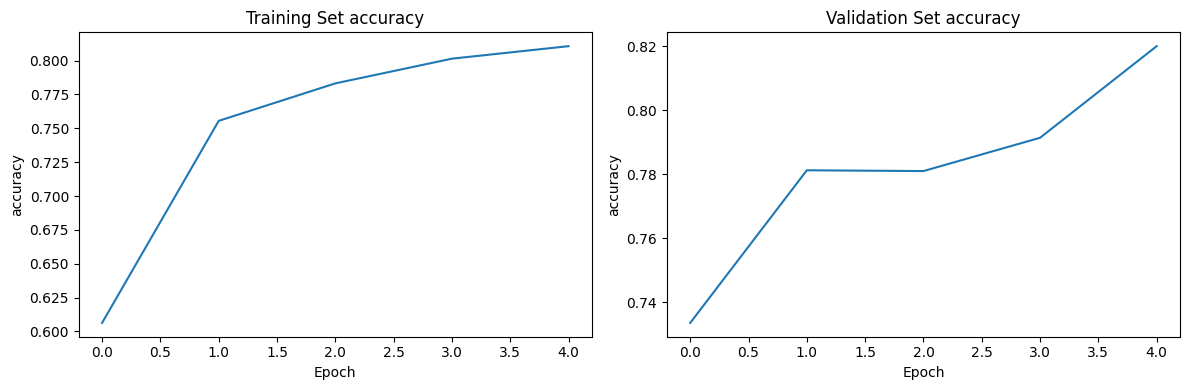

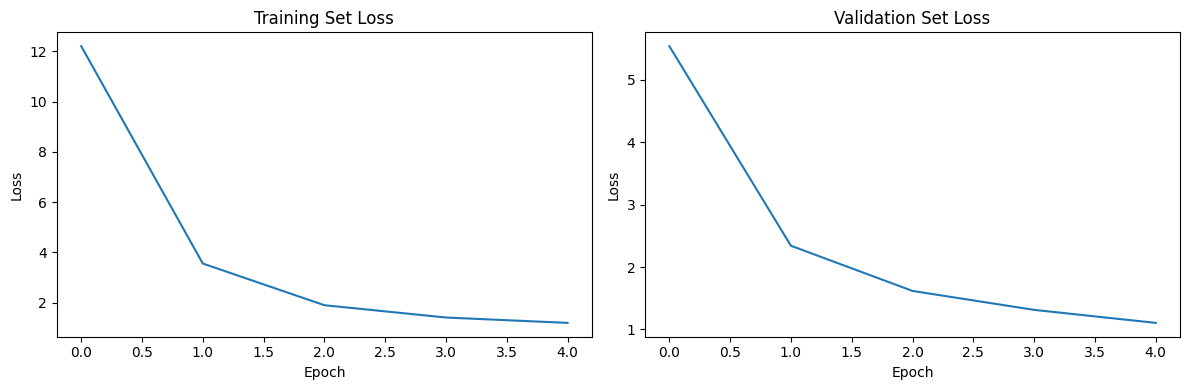


--------------------------------------------------------------------------------------------------------------
Model 2: model_13_10_2023-18h_18m_45s

Testing parameters: {'buffer_size': 300, 'batch_size': 16, 'learning_rate': 0.0002, 'dropout_prob': 0.3, 'n_filters': 32, 'w_decay': 0.006, 'epochs': 5, 'early_stop_patience': 15, 'early_stop_min_delta': 0.0001, 'n_blocks': 5, 'drop_multiplier': [0.0, 0.0, 0.5, 1.0, 1.5], 'weight_multiplier': [0.0, 1.0, 1.0, 1.0, 1.0], 'filter_growth': 2}
Epoch 1/5
162/162 [==============================] - 14s 78ms/step - loss: 12.1482 - accuracy: 0.6022 - val_loss: 5.4724 - val_accuracy: 0.6798
Epoch 2/5
162/162 [==============================] - 11s 66ms/step - loss: 3.4489 - accuracy: 0.7610 - val_loss: 2.2017 - val_accuracy: 0.8015
Epoch 3/5
162/162 [==============================] - 11s 66ms/step - loss: 1.7816 - accuracy: 0.7948 - val_loss: 1.4514 - val_accuracy: 0.8126
Epoch 4/5
162/162 [==============================] - 11s 68ms/step - loss: 1.3

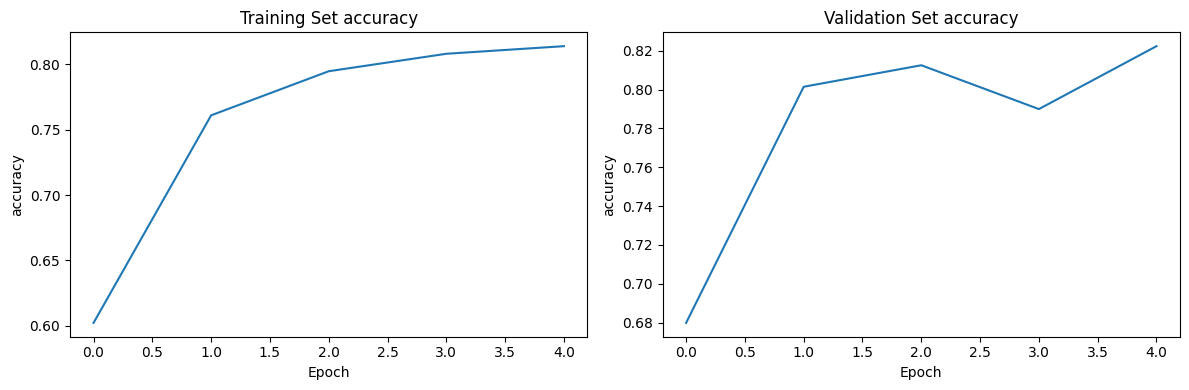

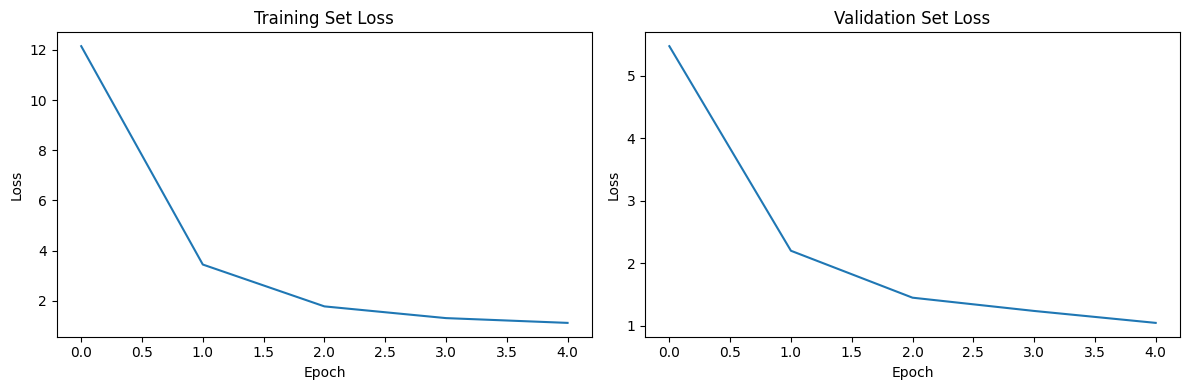


--------------------------------------------------------------------------------------------------------------
Model 3: model_13_10_2023-18h_19m_43s

Testing parameters: {'buffer_size': 300, 'batch_size': 16, 'learning_rate': 0.0002, 'dropout_prob': 0.3, 'n_filters': 32, 'w_decay': 0.006, 'epochs': 5, 'early_stop_patience': 15, 'early_stop_min_delta': 0.0001, 'n_blocks': 5, 'drop_multiplier': [0.0, 0.0, 0.5, 1.0, 1.5], 'weight_multiplier': [0.0, 1.0, 1.0, 1.0, 1.0], 'filter_growth': 2}
Epoch 1/5
162/162 [==============================] - 15s 83ms/step - loss: 12.4094 - accuracy: 0.5480 - val_loss: 5.6623 - val_accuracy: 0.6913
Epoch 2/5
162/162 [==============================] - 11s 66ms/step - loss: 3.6424 - accuracy: 0.7394 - val_loss: 2.3510 - val_accuracy: 0.7833
Epoch 3/5
162/162 [==============================] - 11s 66ms/step - loss: 1.8808 - accuracy: 0.7901 - val_loss: 1.5548 - val_accuracy: 0.7973
Epoch 4/5
162/162 [==============================] - 11s 66ms/step - loss: 1.3

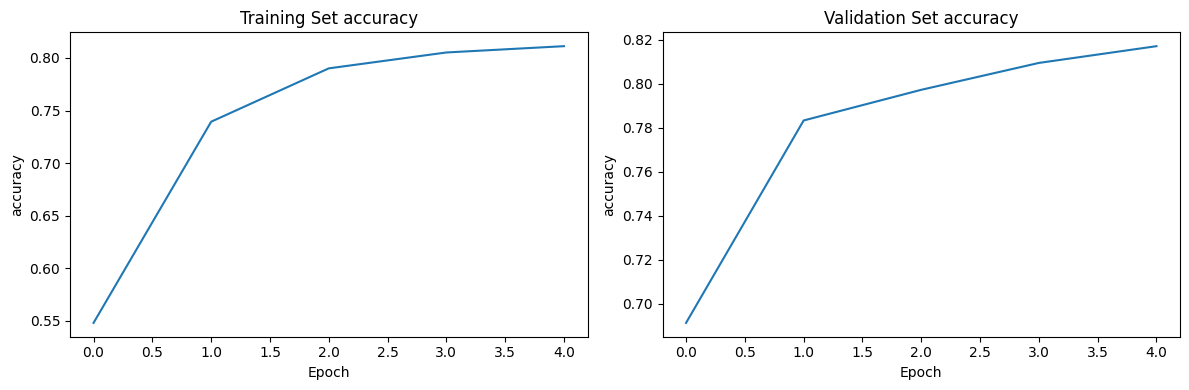

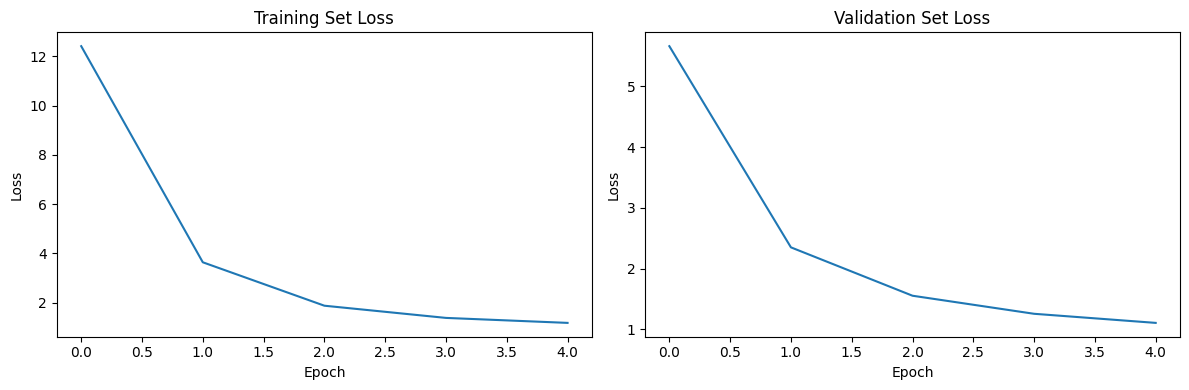

In [15]:
all_models, unet_models = hyperparameters_model_modular(num_of_trials = 3,
                                param_ranges = param_ranges_continuous, 
                                processed_image_ds_train=processed_image_ds_train, 
                                processed_image_ds_val=processed_image_ds_val, 
                                processed_image_ds_test=processed_image_ds_test,
                                img_height=HEIGHT,
                                img_width=WIDTH,
                                num_channels=N_BANDS,
                                num_classes= N_CLASSES,
                                compare_acc = True,
                                compare_lss = True,
                                early_stopping = True,
                                restore_best=True
                                )

In [16]:
best_avg_f1_model, results = add_models_info(all_models,
                    processed_image_ds_train, 
                    processed_image_ds_val,
                    processed_image_ds_test,
                    unet_models,
                    lgnd)

MODEL: model_13_10_2023-18h_17m_51s
Dataset loss: 1.1041
Dataset accuracy: 82.0%
True lables unique: [1 2 3 4 5]
Predicted lables unique: [1 2 3 4 5]

----------------------------------------------
Confusion Matrix
[[ 174501   18246      13   20364   35876]
 [   3797  596393       0    8624  182828]
 [    935     103    3300    7434    1960]
 [  26143   26255      77 1370261  162016]
 [  30971   71878       5   80754  945586]]

----------------------------------------------

Class 1: Precision = 0.7383, Recall = 0.7008, F1 Score = 0.7191   <---->   Build. + Other constr.
Class 2: Precision = 0.8366, Recall = 0.7534, F1 Score = 0.7928   <---->   Bare + Seasonal + Vineyards
Class 3: Precision = 0.9720, Recall = 0.2403, F1 Score = 0.3854   <---->   Water
Class 4: Precision = 0.9212, Recall = 0.8647, F1 Score = 0.8920   <---->   Trees + Bushes
Class 5: Precision = 0.7119, Recall = 0.8374, F1 Score = 0.7696   <---->   Permanent herbaceous vegetation

Average F1 Score: 0.7118
---------------

In [17]:
merged_info = merge_model_info(all_models, results)

In [18]:
save_models_and_info(merged_info, MODELS_DIR, lgnd)

INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_20m_54s/model_13_10_2023-18h_17m_51s/model_13_10_2023-18h_17m_51s_model/assets


INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_20m_54s/model_13_10_2023-18h_17m_51s/model_13_10_2023-18h_17m_51s_model/assets


Saved model 'model_13_10_2023-18h_17m_51s' and its information in 'trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_20m_54s/model_13_10_2023-18h_17m_51s'.
INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_20m_54s/model_13_10_2023-18h_18m_45s/model_13_10_2023-18h_18m_45s_model/assets


INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_20m_54s/model_13_10_2023-18h_18m_45s/model_13_10_2023-18h_18m_45s_model/assets


Saved model 'model_13_10_2023-18h_18m_45s' and its information in 'trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_20m_54s/model_13_10_2023-18h_18m_45s'.
INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_20m_54s/model_13_10_2023-18h_19m_43s/model_13_10_2023-18h_19m_43s_model/assets


INFO:tensorflow:Assets written to: trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_20m_54s/model_13_10_2023-18h_19m_43s/model_13_10_2023-18h_19m_43s_model/assets


Saved model 'model_13_10_2023-18h_19m_43s' and its information in 'trained_models/models_trained_on_18-19_10m/summer/models_folder_13_10_2023-18h_20m_54s/model_13_10_2023-18h_19m_43s'.
